In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [ ]:
df = pd.read_csv('kidney disease.csv')

In [ ]:
df.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [ ]:
df['wc'].unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '\t6200', '7100', '11800', '9400', '5500', '5800',
       '13200', '12500', '5600', '7000', '11900', '10400', '10700',
       '12700', '6800', '6500', '13600', '10200', '9000', '14900', '8200',
       '15200', '5000', '16300', '12400', '\t8400', '10500', '4200',
       '4700', '10900', '8100', '9500', '2200', '12800', '11200', '19100',
       '\t?', '12300', '16700', '2600', '26400', '8800', '7400', '4900',
       '8000', '12000', '15700', '4100', '5700', '11500', '5400', '10800',
       '9900', '5200', '5900', '9300', '9700', '5100', '6600'],
      dtype=object)

In [ ]:
df.shape

(400, 26)

In [ ]:
df = df.drop(['id','pcc','ba','rc','appet','bgr'],axis=1)

In [ ]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'bu', 'sc', 'sod', 'pot',
       'hemo', 'pcv', 'wc', 'htn', 'dm', 'cad', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
df.isna().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
htn                 2
dm                  2
cad                 2
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
null_num_columns = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'bu', 'sc', 'sod', 'pot',
       'hemo', 'pcv', 'wc', 'htn', 'dm', 'cad', 'pe', 'ane']
for column in null_num_columns:
  df[column].fillna(df[column].mode()[0],inplace=True)

In [ ]:
df.isna().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
htn               0
dm                0
cad               0
pe                0
ane               0
classification    0
dtype: int64

In [ ]:
df.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
htn                object
dm                 object
cad                object
pe                 object
ane                object
classification     object
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

category_columns = ['rbc','pc','pcv', 'wc', 'htn', 'dm', 'cad', 'pe', 'ane']
for column in category_columns:
  df[column] = labelencoder.fit_transform(df[column])

In [ ]:
df.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                 int64
pc                  int64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                 int64
wc                  int64
htn                 int64
dm                  int64
cad                 int64
pe                  int64
ane                 int64
classification     object
dtype: object

In [ ]:
df['wc'].unique()

array([72, 56, 70, 62, 68, 90, 64, 88, 18, 43, 19, 10, 39, 13, 49, 84, 57,
       77, 78,  4, 83, 73, 59, 80, 33, 35, 42, 79, 12, 67, 71, 27, 58,  0,
       66, 15, 86, 51, 54, 25, 22, 52, 65, 16,  5,  7, 23, 63, 60, 26,  3,
       82, 28, 76, 29, 46, 31, 21,  1,  6, 41, 44,  9, 75, 87, 36, 24, 11,
       34,  2, 20, 32, 37, 38, 81, 69, 45, 74, 17, 30, 40, 53, 14, 50,  8,
       91, 48, 55, 85, 89, 47, 61])

In [ ]:
features = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'bu', 'sc', 'sod', 'pot',
       'hemo', 'pcv', 'wc', 'htn', 'dm', 'cad', 'pe', 'ane']

<Axes: >

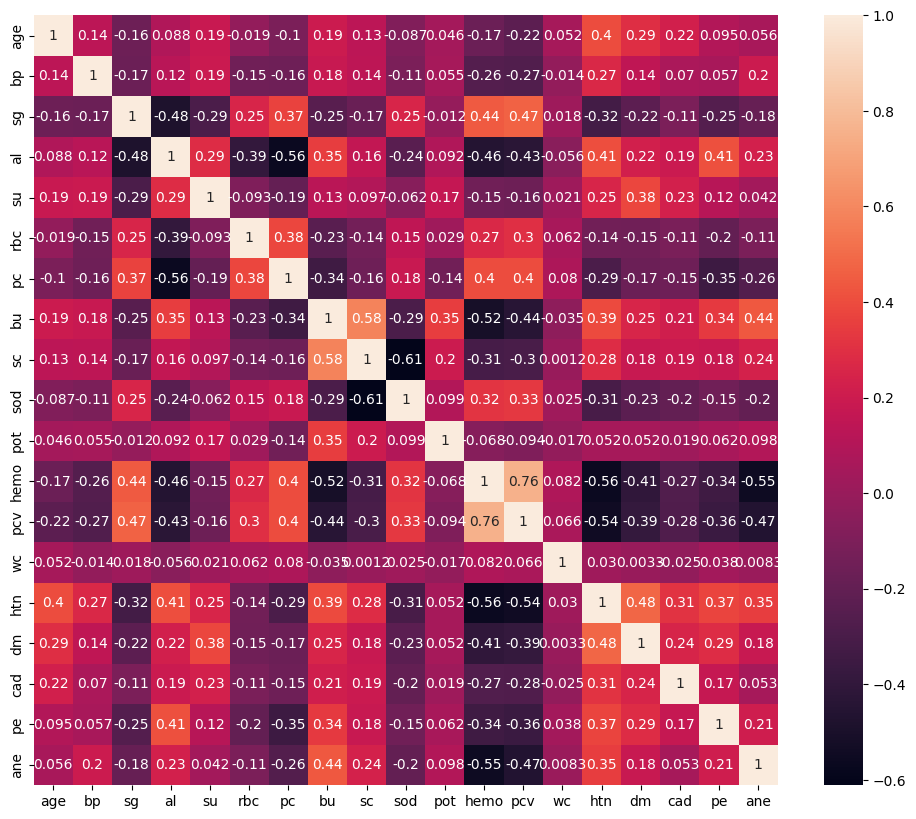

In [ ]:
plt.figure(figsize = (12,10))
sns.heatmap(df[features].corr(),annot = True)

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size = 0.50)

In [ ]:
X_train = train[features]
Y_train = train['classification']

X_test = test[features]
Y_test = test['classification']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
%matplotlib inline

In [ ]:
model = LogisticRegression()
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model.score(X_test,Y_test)

0.955

In [ ]:
Y_pred = model.predict(X_test)
print(Y_pred)

['ckd' 'notckd' 'ckd' 'ckd' 'notckd' 'ckd' 'notckd' 'ckd' 'ckd' 'notckd'
 'ckd' 'notckd' 'ckd' 'notckd' 'notckd' 'notckd' 'ckd' 'ckd' 'ckd'
 'notckd' 'ckd' 'ckd' 'notckd' 'ckd' 'notckd' 'notckd' 'notckd' 'notckd'
 'notckd' 'ckd' 'notckd' 'ckd' 'notckd' 'notckd' 'ckd' 'notckd' 'ckd'
 'ckd' 'ckd' 'ckd' 'ckd' 'notckd' 'ckd' 'ckd' 'notckd' 'notckd' 'notckd'
 'ckd' 'ckd' 'ckd' 'notckd' 'ckd' 'ckd' 'ckd' 'notckd' 'ckd' 'ckd' 'ckd'
 'ckd' 'notckd' 'ckd' 'ckd' 'notckd' 'notckd' 'notckd' 'notckd' 'ckd'
 'notckd' 'notckd' 'ckd' 'ckd' 'ckd' 'notckd' 'notckd' 'ckd' 'ckd' 'ckd'
 'notckd' 'notckd' 'notckd' 'notckd' 'ckd' 'notckd' 'ckd' 'notckd' 'ckd'
 'notckd' 'notckd' 'notckd' 'notckd' 'ckd' 'notckd' 'notckd' 'ckd'
 'notckd' 'ckd' 'notckd' 'ckd' 'ckd' 'ckd' 'notckd' 'notckd' 'notckd'
 'ckd' 'ckd' 'ckd' 'notckd' 'ckd' 'ckd' 'notckd' 'ckd' 'ckd' 'notckd'
 'ckd' 'notckd' 'notckd' 'notckd' 'ckd' 'ckd' 'notckd' 'ckd' 'ckd'
 'notckd' 'notckd' 'notckd' 'ckd' 'notckd' 'notckd' 'ckd' 'ckd' 'notckd'
 'ckd' '

In [ ]:
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[111,   0,   8],
       [  1,   0,   0],
       [  0,   0,  80]])

Text(70.72222222222221, 0.5, 'real')

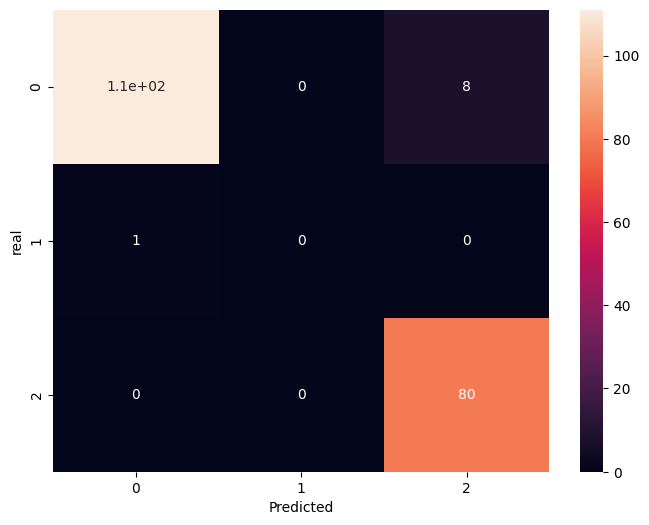

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('real')

In [ ]:
score = accuracy_score(Y_test, Y_pred)*100
acc = round(score, 2)
inac = round(100-acc,2)
corr = (score*len(test))/100
print('Accuracy: ',acc, '%, ', corr, 'correct detections')
print('Inaccuracy: ',inac, '%, ', len(test)-corr, 'Incorrect detections')

Accuracy:  95.5 %,  191.0 correct detections
Inaccuracy:  4.5 %,  9.0 Incorrect detections


In [ ]:
df.loc[0]

age                48.0
bp                 80.0
sg                 1.02
al                  1.0
su                  0.0
rbc                   1
pc                    1
bu                 36.0
sc                  1.2
sod               135.0
pot                 3.5
hemo               15.4
pcv                  32
wc                   72
htn                   1
dm                    4
cad                   1
pe                    0
ane                   0
classification      ckd
Name: 0, dtype: object

In [ ]:
input_data = (48.0,80.0,1.02,1.0,0.0,1,1,36.0,1.2,135.0,3.5,15.4,32,72,1,4,1,0,0)

input_data_as_np_array = np.asarray(input_data)
input_data_reshaped = input_data_as_np_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)

if prediction == [1]:
  print("kidney disease Detected")
else:
  print("kidney disease not detected")

kidney disease not detected


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pickle

In [ ]:
filename = 'kidney disease_model.sav'
pickle.dump(model, open(filename, 'wb'))